In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('neural_nets')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from nn import NeuralNet
from layers import Dense, Dropout, BatchNormalization
from optimizers import SGD, RMSProp, Adam
from losses import Softmax
from activations import ReLU

# For mnist data
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


In [4]:
m, n = X_train.shape
lr = 0.01
num_iter = 10
print_verbose = 1

loss = Softmax()
optimizer = SGD(lr)
# optimizer = Adam()

model = NeuralNet(loss, optimizer)
model.add(Dense(n, 16))
model.add(ReLU())
model.add(Dense(16, 16))
model.add(ReLU())
model.add(Dense(16, 10))

Iteration : 0, Loss : 0.9928740286457995
Iteration : 1, Loss : 0.42296236291674383
Iteration : 2, Loss : 0.33902192310495943
Iteration : 3, Loss : 0.3000684630396908
Iteration : 4, Loss : 0.2752547978177714
Iteration : 5, Loss : 0.25694004178163876
Iteration : 6, Loss : 0.24238563802284352
Iteration : 7, Loss : 0.23062626184064944
Iteration : 8, Loss : 0.22076861324482894
Iteration : 9, Loss : 0.21232933549448524


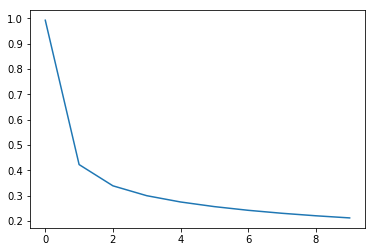

In [5]:
losses = model.train(X_train, y_train, n_iter=num_iter, print_verbose=print_verbose)
plt.plot(range(num_iter), losses);

In [6]:
preds = model.predict(X_test)
(preds == y_test).mean()

0.9338

In [ ]:
# Keras way
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32)

score = model.evaluate(X_test, y_test)

print("Test score : ", score[0])
print("Test accuracy : ", score[1])

Epoch 1/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.8805 - acc: 0.7383
Epoch 2/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3864 - acc: 0.8895
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3249 - acc: 0.9070
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2922 - acc: 0.9166
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2684 - acc: 0.9223
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2496 - acc: 0.9280
Epoch 7/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2341 - acc: 0.9326
Epoch 8/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2208 - acc: 0.9355
Epoch 9/10
27136/60000 [============>.................] - ETA: 2s - loss: 0.2098 - acc: 0.9390

In [ ]:
plt.plot(history.history['loss'])